<a href="https://colab.research.google.com/github/BYU-Hydroinformatics/ggst-notebooks/blob/main/plot_gap_filled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot Gap-filled Data

This notebook takes the CSV produced by the gap-filling colab notebook described here:

https://ggst.readthedocs.io/en/latest/wtf/

and plots the results with the original and imputed data in different colors.

## Upload and import completed CSV file

In [ ]:
# Upload CSV file containing storage anomaly time series with gaps. This file should have two columns
# with the first column = dates, and second column = data.

from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  uploaded_file_name = fn
  print(f'User uploaded file "{fn}"')

Saving dr_completed.csv to dr_completed.csv
User uploaded file "dr_completed.csv"


# Parse original vs imputed

Import the csv file into a dataframe and make the index a datetime object. Also, as we import the data from the "ts" column, some numbers only have 2-3 digits beyond the decimal point and some have a large number of digits (15 or so). The rows with only 2-3 decimal places are the original data. Copy these values to a new column called "original". Copy the other values to a new column called "imputed".

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV into a DataFrame, parsing the 'Date' column as datetime and setting it as the index
df = pd.read_csv(uploaded_file_name, parse_dates=['Date'], index_col='Date')

# Create 'original' and 'imputed' columns
df['original'] = np.nan
df['imputed'] = np.nan

# Function to count decimal places
def count_decimal_places(number):
    s = str(number)
    if '.' in s:
        return len(s.split('.')[1])
    return 0

# Iterate through the 'ts' column and populate 'original' and 'imputed'
for index, row in df.iterrows():
    ts_value = row['ts']
    if pd.notna(ts_value):
        if count_decimal_places(ts_value) <= 3:
            df.loc[index, 'original'] = ts_value
        else:
            df.loc[index, 'imputed'] = ts_value

# Display the first few rows of the modified DataFrame
display(df.head(20))

,ts,original,imputed
Date,,,
2002-04-01,1.015000,1.015,NaN
2002-05-01,-1.295000,-1.295,NaN
2002-06-01,-3.064452,NaN,-3.064452
2002-07-01,-0.848320,NaN,-0.848320
2002-08-01,-3.858000,-3.858,NaN
2002-09-01,4.106000,4.106,NaN
2002-10-01,1.271000,1.271,NaN
2002-11-01,-0.954000,-0.954,NaN
2002-12-01,1.998000,1.998,NaN


In [ ]:
# Add a buffer to the 'imputed' column at transitions from NaN to data and data to NaN
for i in range(1, len(df)):
    # Check if transitioning to an imputed region by looking at the original column
    if i > 0 and pd.notna(df['original'].iloc[i-1]) and pd.isna(df['original'].iloc[i]):
        df.loc[df.index[i-1], 'imputed'] = df['ts'].iloc[i-1]
    # Check if transitioning from an imputed region by looking at the original column
    if i > 0 and pd.isna(df['original'].iloc[i-1]) and pd.notna(df['original'].iloc[i]):
        df.loc[df.index[i], 'imputed'] = df['ts'].iloc[i]

# Display the first few rows of the modified DataFrame to verify
display(df.head(20))

,ts,original,imputed
Date,,,
2002-04-01,1.015000,1.015,NaN
2002-05-01,-1.295000,-1.295,-1.295000
2002-06-01,-3.064452,NaN,-3.064452
2002-07-01,-0.848320,NaN,-0.848320
2002-08-01,-3.858000,-3.858,-3.858000
2002-09-01,4.106000,4.106,NaN
2002-10-01,1.271000,1.271,NaN
2002-11-01,-0.954000,-0.954,NaN
2002-12-01,1.998000,1.998,NaN


# Plot original vs imputed data

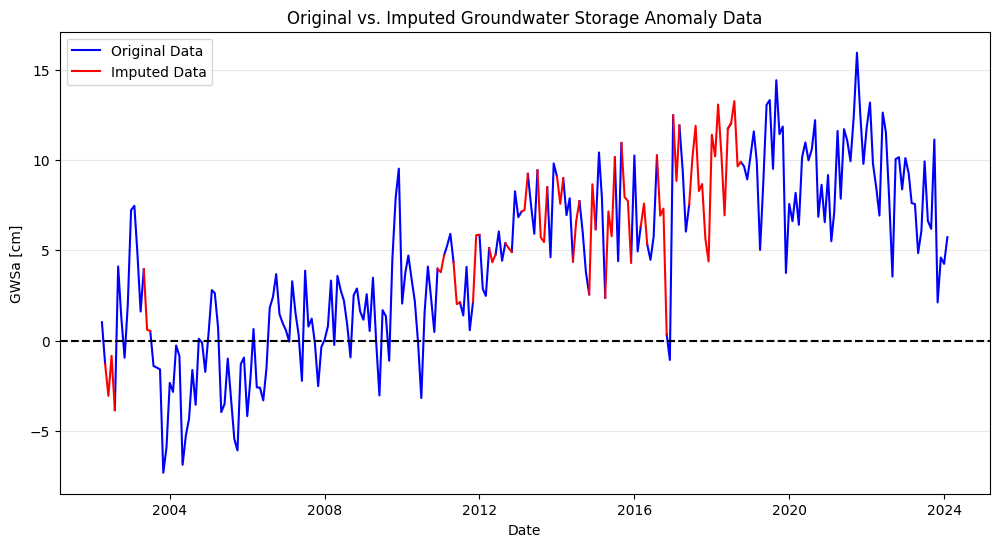

In [ ]:
import matplotlib.pyplot as plt

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['original'], label='Original Data', color='blue')
plt.plot(df.index, df['imputed'], label='Imputed Data', color='red')

# Add title and labels
plt.title('Original vs. Imputed Groundwater Storage Anomaly Data')
plt.xlabel('Date')
plt.ylabel('GWSa [cm]')

# Add a legend
plt.legend()

# Show the plot
ax = plt.gca() # Get the current axes
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

# export plot to png in 300 dpi
plt.savefig('original_vs_imputed.png', dpi=300)

plt.show()


# Export to CSV and download

In [ ]:
import os

# Get the base name of the uploaded file without the extension
base_filename = os.path.splitext(uploaded_file_name)[0]

# Create the new output filename
output_filename = f'{base_filename}_split.csv'

# Export the DataFrame to a CSV file
df.to_csv(output_filename)

# Download the file
from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>